In [1]:
import sys
sys.path.insert(0, '/Users/user/Desktop/repo_for_pyseries/pyseries')

import pyseries.LoadingData as loading
import pyseries.Preprocessing as prep
import pyseries.Analysis as analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Notebook settings (i.e. this thing settings)
%matplotlib inline
#%matplotlib notebook
#Change to %matplotlib notebook to be able to zoom, pan, etc the figures,
#inline is only used so the notebook can be exported to .rst format and hosted on readthedocs
%load_ext autoreload
%autoreload 2

In [15]:

def calc_corr(path):
    #Read single subject data - eeg, info about eeg and info from experimental app (unity)
    recording = loading.Read_edf.Combine_EDF_XML(path, 3, 70)
    #Display markers over the whole signal    
    prep.Epochs.mark_events(recording,['EEG O1'], subject_name = path)

    #Define epochs for analysis
    epochs_info= {"Please Count": [0, 500*10], "Only Look": [0, 500 *10]}
    #Create them by slicing the signal
    epochs = prep.Epochs.Make_Epochs_for_Channels(recording, ['EEG O1','EEG O2','EEG P3', 'EEG P4'],epochs_info)
    #Re-reference, because only by subtracting P from O-electrodes ssvep response becomes visible
    new_ref = {}
    new_ref['Only Look'] = epochs ['EEG O2']['Only Look'] - epochs['EEG P4']['Only Look']
    new_ref['Please Count'] = epochs ['EEG O2']['Please Count'] - epochs ['EEG P4']['Please Count']
    new_epochs  = {"O-P":new_ref}
    
    #Get the accuracy in counting condition
    responses = recording['events'][recording['events']["code"] == "responded"]
    accuracy = responses['response'] / responses['expected']
    
    #Get the power spectra in two conditions       
    power_density= analysis.Explore.PlotPowerSpectrum(new_epochs['O-P'], 498, mode = 'period', name = path, freq_min = 0, freq_max = 20)
    
    ssvep = analysis.Normalize.Z_score( power_density['Please Count'][1][:,49] )
    accuracy = analysis.Normalize.Z_score( accuracy )
    
    return ssvep, accuracy, power_density
    


In [16]:

def plot_slow_ssvep():
    #Slow is 5Hz flicker
    paths = ['/Users/user/Desktop/nagrania_eeg/ssvep/Blazej_13_06_16/',
            '/Users/user/Desktop/nagrania_eeg/ssvep/Ania_14_06_16/',
            '/Users/user/Desktop/nagrania_eeg/ssvep/Karen_14_06_16/',
            '/Users/user/Desktop/nagrania_eeg/ssvep/Agnieszka_03_06/',
            '/Users/user/Desktop/nagrania_eeg/ssvep/Kuba_14_06_16/',
            '/Users/user/Desktop/nagrania_eeg/ssvep/Rysiek_03_06/'
            ]

    all_ssvep = []
    all_acc = []
    
    saving = {}
    for p in paths:
        ssvep, acc, pxx = calc_corr(p)
        all_ssvep.extend(ssvep)
        all_acc.extend(acc)
        
        saving[p] = ssvep
    
    sns.jointplot(x = np.array(all_ssvep),y =  np.array(all_acc), kind="reg")
    return saving

In [20]:

def plot_fast_ssvep():
    #fast is 20 Hz flicker
    paths = ['/Users/user/Desktop/nagrania_eeg/ssvep_20hz/Agnieszka_03_06/', 
             '/Users/user/Desktop/nagrania_eeg/ssvep_20hz/Rysiek_03_06/']

    for path in paths:
    
        #Read single subject data - eeg, info about eeg and info from experimental app (unity)
        recording = loading.Read_edf.Combine_EDF_XML(path, 0, 70)
        #Define epochs for analysis
        epochs_info= {"Only Look": [0, 500 *10]}
        #Create them by slicing the signal
        epochs = prep.Epochs.Make_Epochs_for_Channels(recording, ['EEG O1','EEG O2','EEG P3','EEG P4'],epochs_info)
        #Re-reference, because oonly then ssvep response becomes visible
        new_ref = {}
        new_ref['Only Look'] = epochs ['EEG O2']['Only Look'] - epochs['EEG P4']['Only Look']
        new_epochs  = {"O-P":new_ref}
                
        #Get the power spectra in two conditions       
        power_density= analysis.Explore.PlotPowerSpectrum(new_epochs['O-P'], 498, mode = 'period', name = path, freq_min = 0, freq_max = 30)
    

Channels:
EEG F3
EEG F4
EEG P3
EEG P4
EEG O1
EEG O2
EEG T6
EEG A2
EEG Pz
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Blazej_13_06_16/
Channels:
EEG Fp1
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG T5
EEG T6
EEG Pz
S1
S2
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Ania_14_06_16/
Channels:
EEG Fp1
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG T3
EEG T4
EEG Pz
S1
S2
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Karen_14_06_16/
Channels:
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG A2
EEG Cz
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Agnieszka_03_06/
Channels:
EEG Fp2
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG T3
EEG Fz
EEG Cz
S1
S2
S3
S4
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Kuba_14_06_16/
Channels:
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG A2
EEG Cz
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep/Rysiek_03_06/


/Users/user/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


{'/Users/user/Desktop/nagrania_eeg/ssvep/Agnieszka_03_06/': array([ 1.62312664, -0.64587493, -1.07742191, -0.57539491,  0.6755651 ]),
 '/Users/user/Desktop/nagrania_eeg/ssvep/Ania_14_06_16/': array([-1.88734758,  0.41555267,  1.08925904,  0.2441026 ,  0.13843327]),
 '/Users/user/Desktop/nagrania_eeg/ssvep/Blazej_13_06_16/': array([-1.51988438,  1.45266728, -0.50483657,  0.56995163,  0.00210205]),
 '/Users/user/Desktop/nagrania_eeg/ssvep/Karen_14_06_16/': array([-0.52336364, -0.10604935,  1.53643037,  0.53210927, -1.43912664]),
 '/Users/user/Desktop/nagrania_eeg/ssvep/Kuba_14_06_16/': array([-1.1445404 , -0.02263413, -1.07913341,  1.15506314,  1.09124479]),
 '/Users/user/Desktop/nagrania_eeg/ssvep/Rysiek_03_06/': array([ 0.57460658,  1.19457484, -1.48773301,  0.56278917, -0.84423758])}

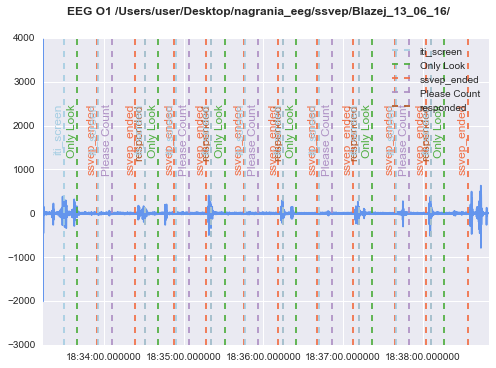

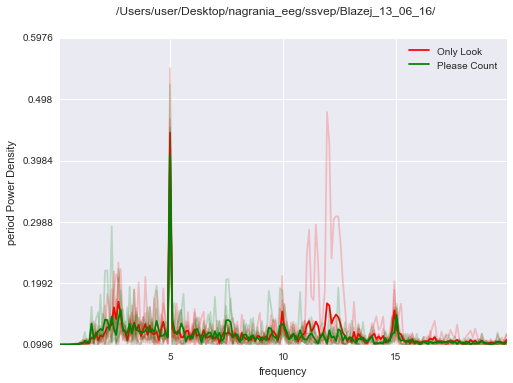

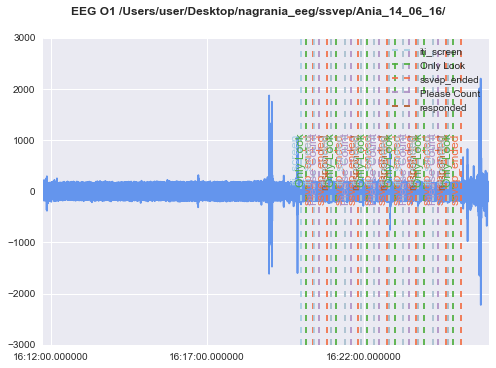

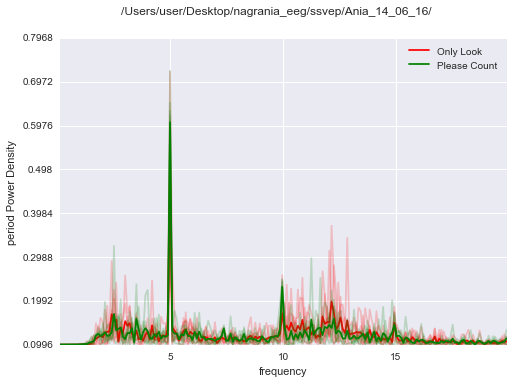

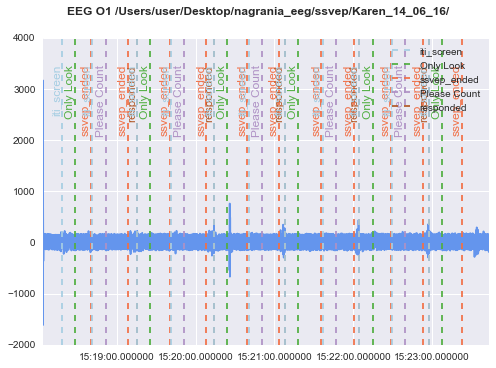

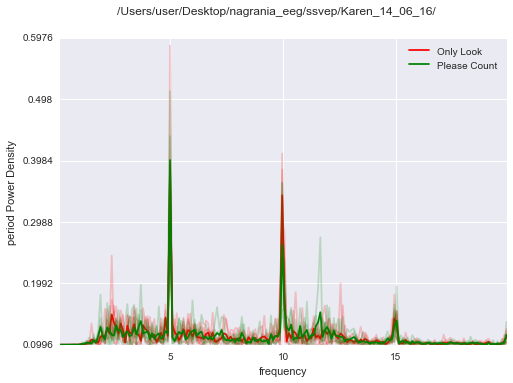

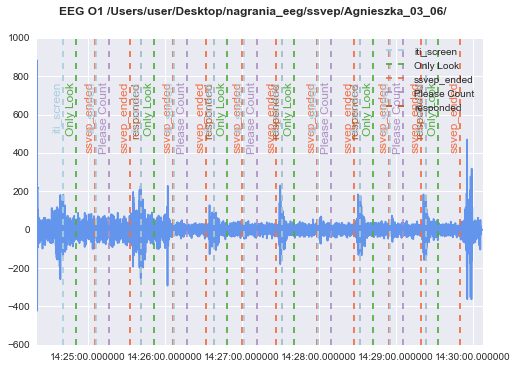

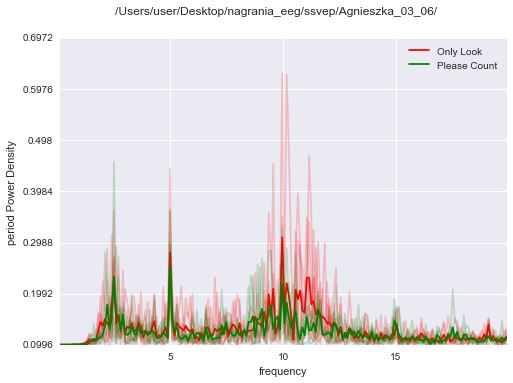

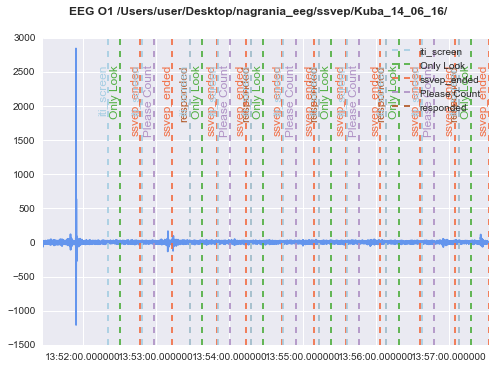

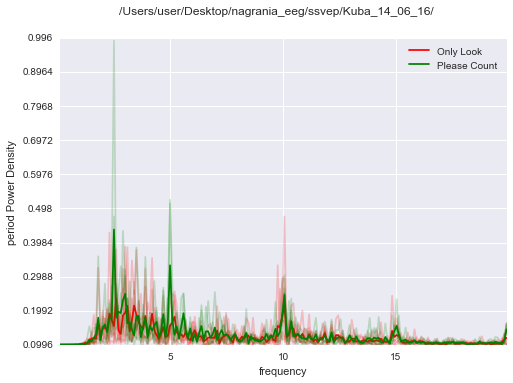

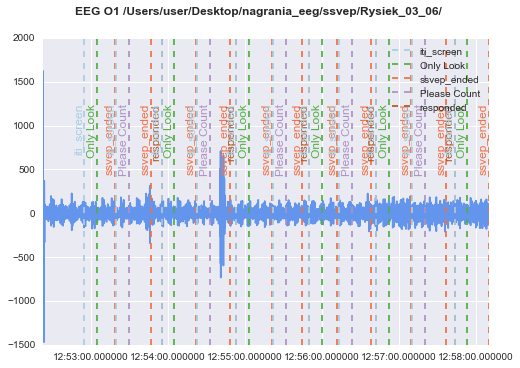

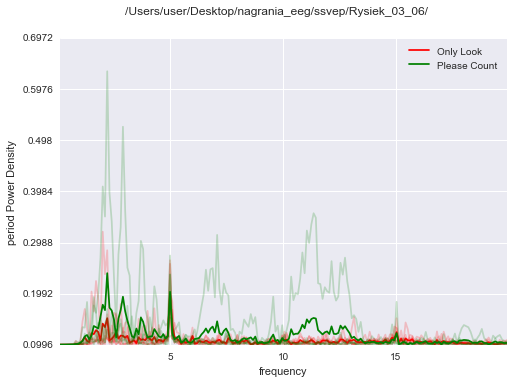

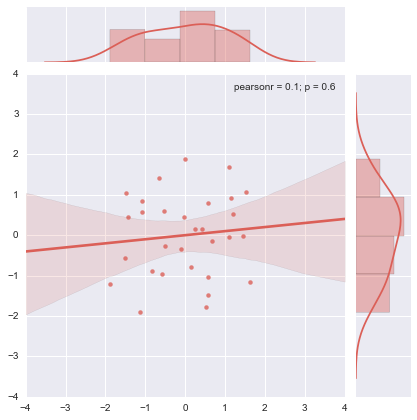

In [21]:
plot_slow_ssvep()


Channels:
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG A2
EEG Cz
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep_20hz/Agnieszka_03_06/
Channels:
EEG F3
EEG F4
EEG C3
EEG C4
EEG P3
EEG P4
EEG O1
EEG O2
EEG A2
EEG Cz
(497.971446705165,)
/Users/user/Desktop/nagrania_eeg/ssvep_20hz/Rysiek_03_06/


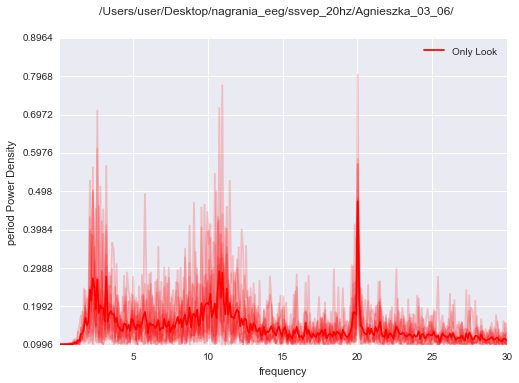

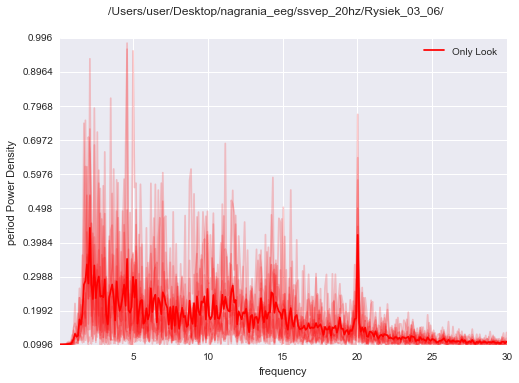

In [22]:
plot_fast_ssvep()